In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('exdata1.csv', names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


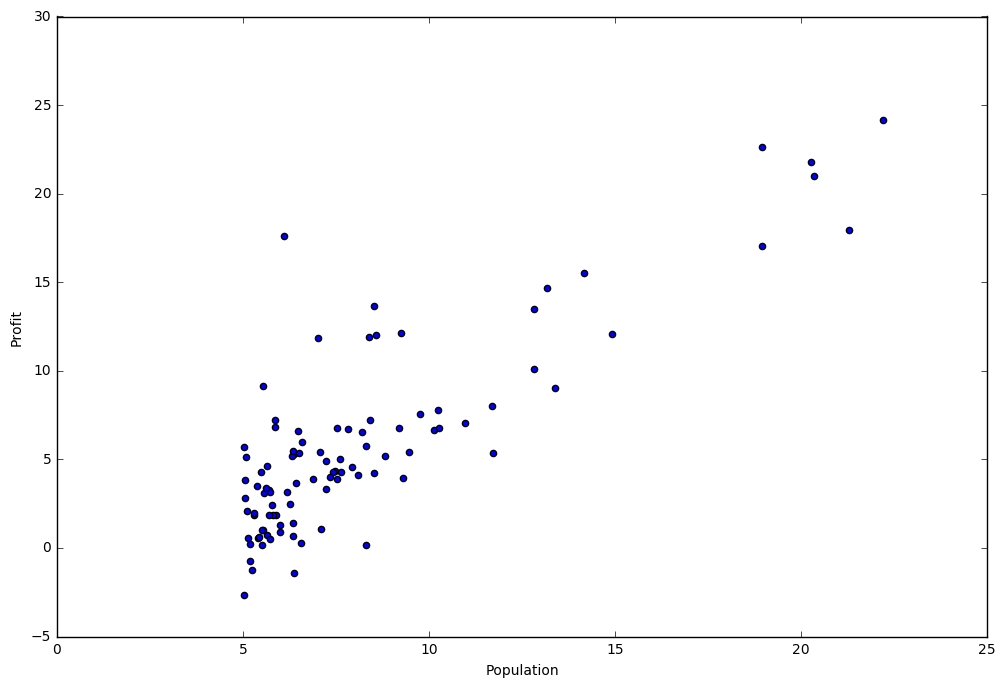

In [9]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [13]:
def ComputeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [21]:
#data.insert(0, 'Ones', 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [24]:
cols = data.shape[1]
X = data.iloc[:, :cols-1]
y = data.iloc[:, cols-1:cols]

In [108]:
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(np.array([-3,1]))

In [74]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [95]:
ComputeCost(X, y, theta)

32.072733877455669

In [101]:
theta.shape[1]

2

In [116]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    params = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(params):
            term = np.multiply(error, X[:, j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = ComputeCost(X, y, theta)
    
    return theta, cost

-0.013179100000000001

In [117]:
alpha = 0.01
iters = 1000

g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.7466463 ,  1.17805146]])

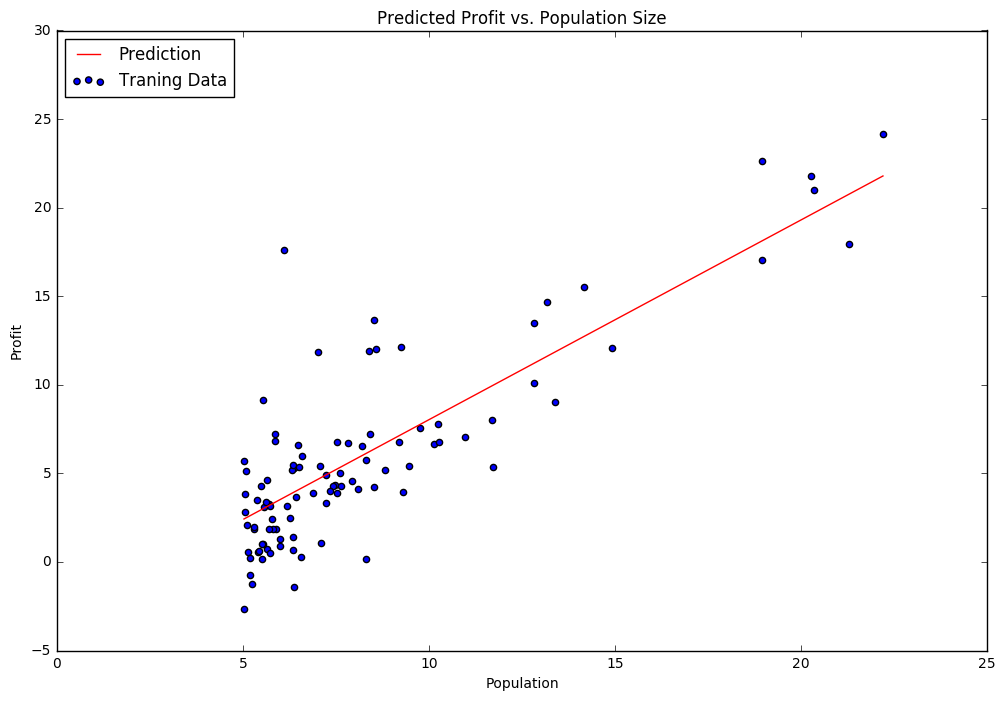

In [89]:
x = np.linspace(data.Population.min(), data.Population.max())
f = g[0,0] + (g[0,1] * x)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')

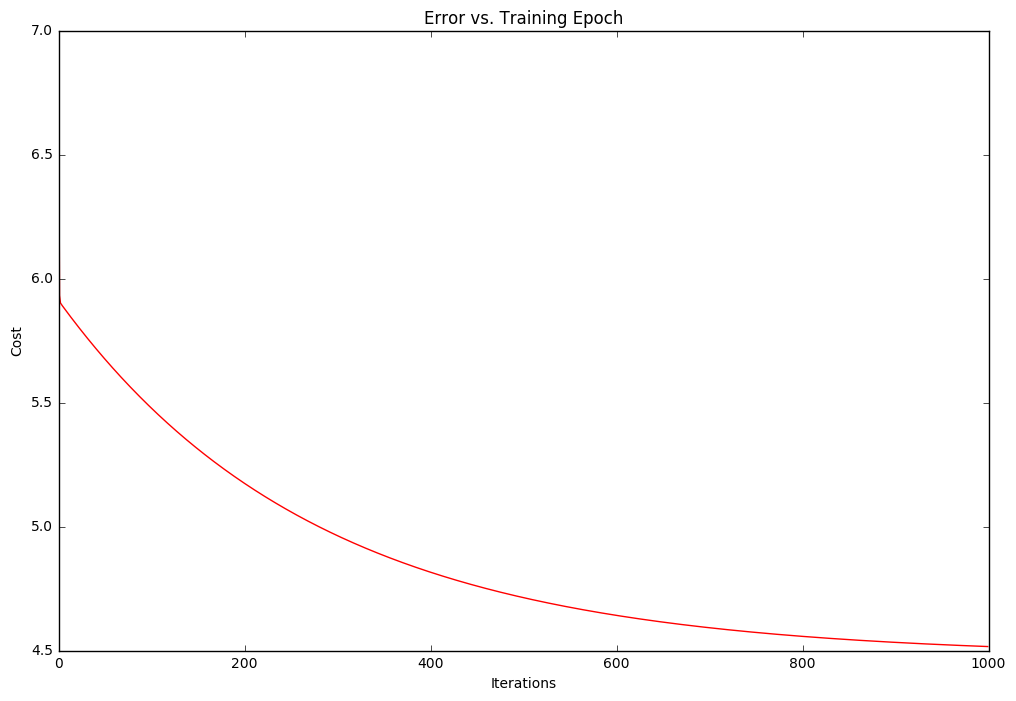

In [91]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

In [115]:
ComputeCost(X, y, g)

4.5159555030789127